In [2]:
# import reqd libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Cust_Segmentation.csv')

In [4]:
data.shape

(850, 10)

In [8]:
data

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,0,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0,NBA012,2.9


In [10]:
X = data.drop(columns=['Customer Id','Address'])
X

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0,6.3
1,47,1,26,100,4.582,8.218,0,12.8
2,33,2,10,57,6.111,5.802,1,20.9
3,29,2,4,19,0.681,0.516,0,6.3
4,47,1,31,253,9.308,8.908,0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0,6.8
846,28,2,7,34,0.359,2.021,0,7.0
847,25,4,0,18,2.802,3.210,1,33.4
848,32,1,12,28,0.116,0.696,0,2.9


In [12]:
X.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

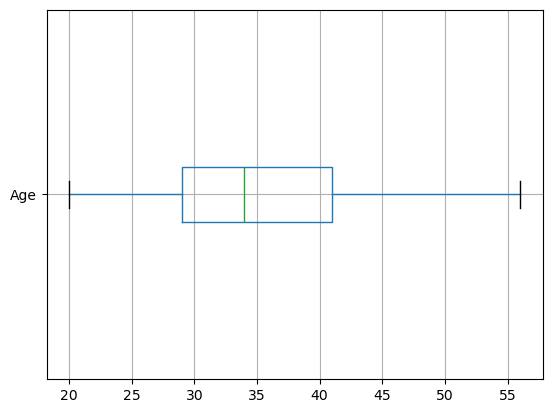

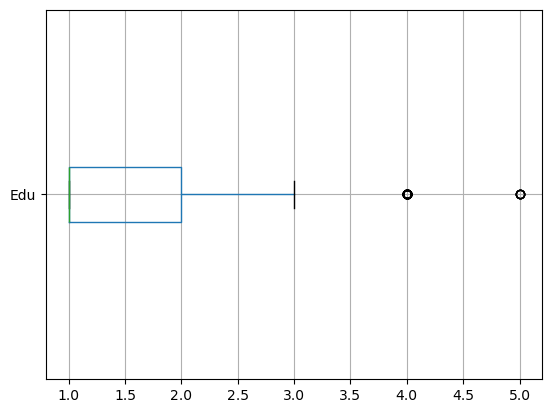

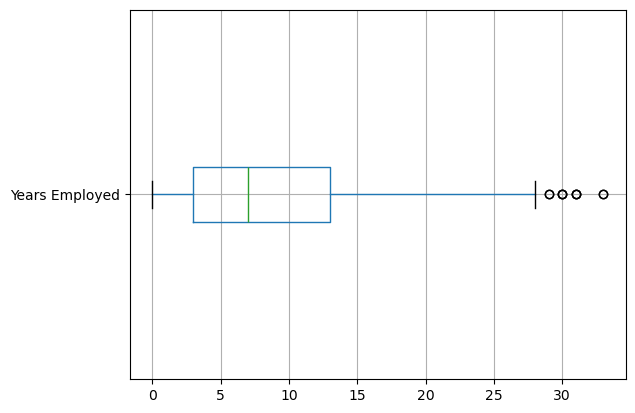

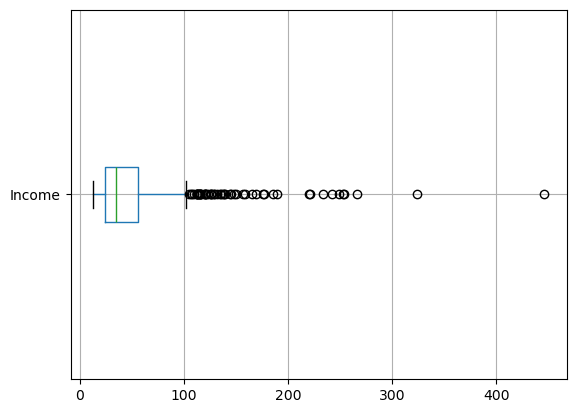

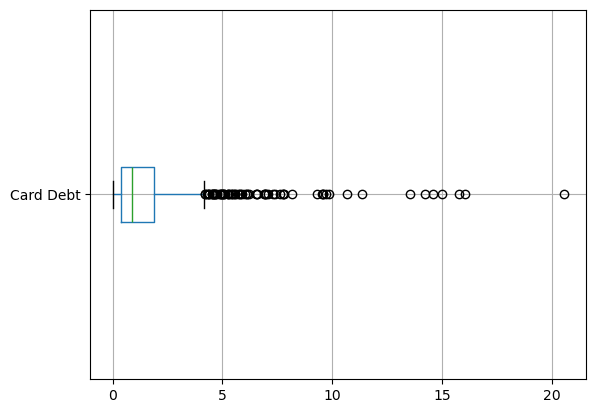

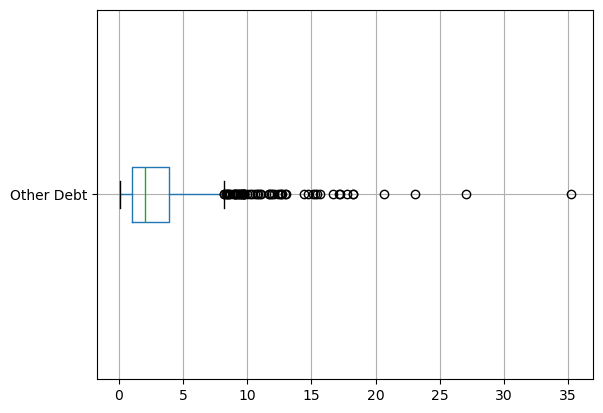

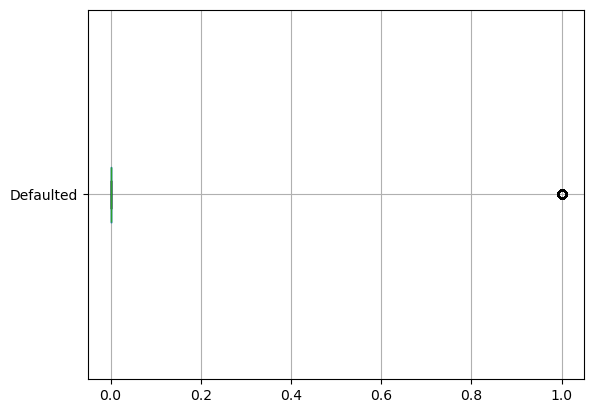

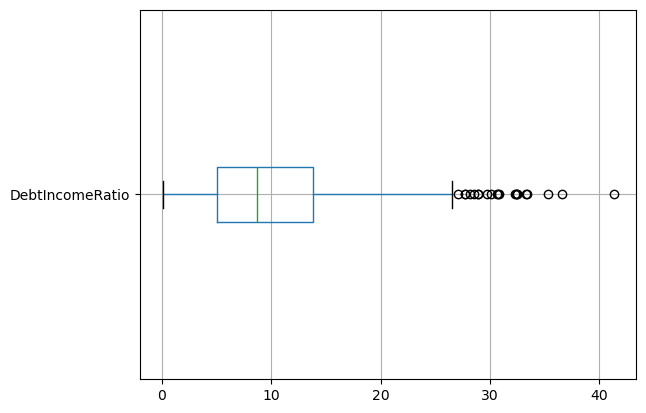

In [14]:
for column in X:
    X.boxplot([column],vert=False)
    plt.show()

In [16]:
def remove_outlier_rows(df_in):
    df_out = df_in.copy()
    rows_to_drop = set()
    
    for col_name in df_in.columns:
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
    
        iqr = q3 - q1
        fence_low = q1 -1.5*iqr
        fence_high = q3 +1.5*iqr
        
        #print(col_name, q1,q3)
        
        #display(df_in[(df_in[col_name]<fence_low) | (df_in[col_name]>fence_high)])
        
        outlier_rows = df_in[(df_in[col_name]<fence_low) | (df_in[col_name]>fence_high)].index
        rows_to_drop.update(outlier_rows)
        
    df_out = df_out.drop(rows_to_drop)
    return df_out 
or_X = remove_outlier_rows(X)        
or_X

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0,6.3
3,29,2,4,19,0.681,0.516,0,6.3
5,40,1,23,81,0.998,7.831,0,10.9
6,38,2,4,56,0.442,0.454,0,1.6
7,42,3,0,64,0.279,3.945,0,6.6
...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0,4.4
845,27,1,5,26,0.548,1.220,0,6.8
846,28,2,7,34,0.359,2.021,0,7.0
848,32,1,12,28,0.116,0.696,0,2.9


In [18]:
or_X.shape, X.shape

((540, 8), (850, 8))

In [20]:
orignal_X = X.copy()
X = or_X.copy()

In [22]:
from sklearn.cluster import KMeans

In [23]:
res = []
for i in range(2,10):
    clust = KMeans(n_clusters=i, random_state=42)
    clust.fit(X)
    cl_labels = clust.predict(X)
    res.append(clust.inertia_)

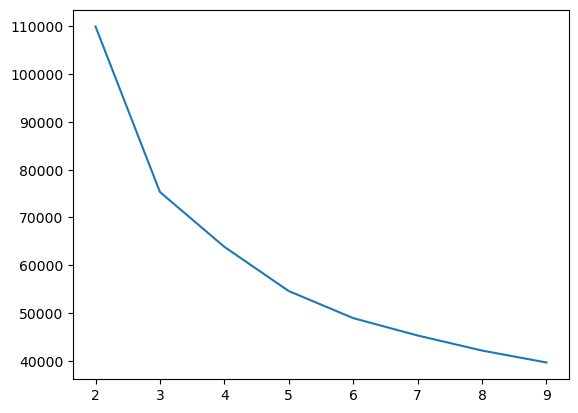

In [24]:
plt.plot(range(2,10),res)
plt.show()

In [54]:
clust = KMeans(n_clusters=10, random_state=42)
clust.fit(X)
cl_labels = clust.predict(X)
X['cluster'] = cl_labels
X

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0,6.3,8
3,29,2,4,19,0.681,0.516,0,6.3,0
5,40,1,23,81,0.998,7.831,0,10.9,5
6,38,2,4,56,0.442,0.454,0,1.6,1
7,42,3,0,64,0.279,3.945,0,6.6,1
...,...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0,4.4,9
845,27,1,5,26,0.548,1.220,0,6.8,3
846,28,2,7,34,0.359,2.021,0,7.0,3
848,32,1,12,28,0.116,0.696,0,2.9,3


In [55]:
X.cluster.unique()

array([8, 0, 5, 1, 9, 2, 3, 6, 4, 7])

In [56]:
X['cluster'].value_counts()

cluster
3    96
0    90
8    59
1    59
6    59
9    46
5    43
2    41
7    35
4    12
Name: count, dtype: int64

In [61]:
X.groupby('cluster').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,25.911111,1.366667,2.855556,19.011111,0.440644,1.016600,0.0,7.710000
1,37.457627,1.627119,12.050847,57.576271,1.263305,3.343288,0.0,8.023729
2,38.439024,1.243902,16.536585,42.804878,0.898683,2.043854,0.0,7.007317
3,30.166667,1.427083,7.020833,27.916667,0.480698,1.149000,0.0,5.812500
4,43.416667,1.750000,20.000000,95.666667,1.467250,2.654750,0.0,4.258333
5,42.720930,1.744186,14.604651,74.232558,1.601186,3.274628,0.0,6.620930
6,30.440678,1.762712,7.372881,41.915254,1.275525,3.112508,0.0,10.572881
7,30.914286,1.371429,5.914286,25.685714,1.599314,2.944114,0.0,17.677143
8,41.932203,1.372881,4.661017,24.932203,0.708814,1.705136,0.0,9.467797


In [63]:
	Age	Edu	Years Employed	Income	Card Debt	Other Debt	Defaulted	DebtIncomeRatio
cluster								
0	27.139073	1.397351	3.754967	21.218543	0.545954	1.180404	0.0	8.235099
1	42.382353	1.720588	15.058824	75.955882	1.536235	3.267559	0.0	6.491176
2	36.427746	1.427746	6.942197	29.572254	0.782347	1.824451	0.0	8.849133
3	35.979730	1.520270	11.479730	47.209459	1.139865	2.652932	0.0	8.106081


SyntaxError: invalid syntax (768302534.py, line 1)

##### customer Segmentation based on the clusters
* cl= 0, Age=27  edu 1.5 exp= 4  inc=20 dti=8.5 -> low_inc_little_risk
* cl= 1, Age=42  edu 2   exp= 15 inc=75 dti=6.5 -> veryhigh_inc_no_risk
* cl= 2, Age=26  edu 1.5 exp= 7  inc=30 dti=9   -> mid_inc_high_risk
* cl= 3, Age=35  edu 1.5 exp= 11 inc=47 dti=8   -> high_inc_little_risk


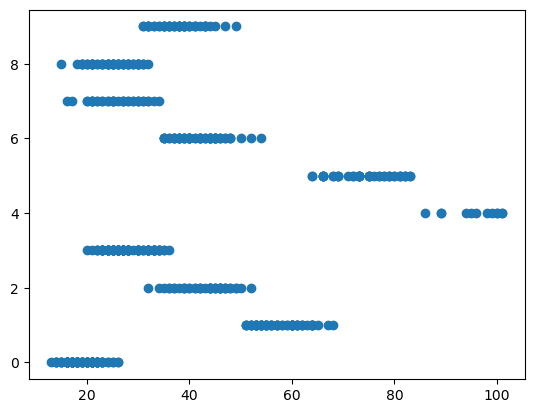

In [66]:
plt.scatter(X['Income'],X['cluster'])

In [68]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,cl_labels)
print(score)

0.26742467704219197


#### Silhouette score measure the performancfe of the cluster
* range : -1 to +1
*     +1: well-clustered with good boundary 
*     0: cluster is fine (nearer to the boundary) 
*     -1: cluster wrongly
        
        

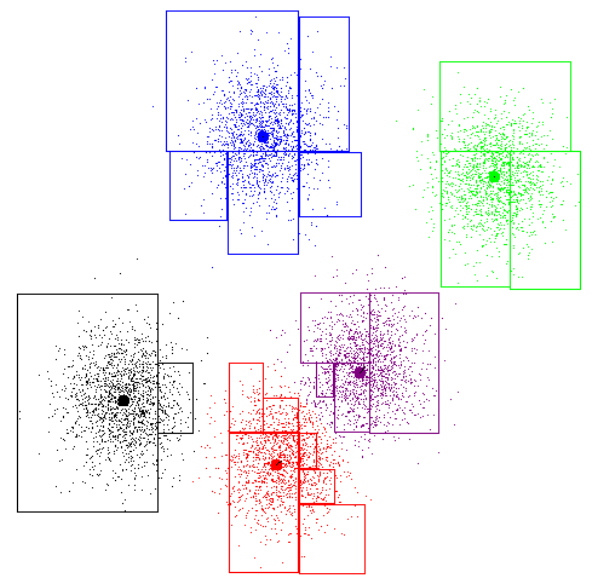